In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from  sklearn import metrics

In [3]:
data=pd.read_csv('breast-cancer.csv')

In [4]:
print(data.shape)

(569, 32)


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [6]:
data.head(8)
#diagnosis(진단): M=악성 , B=양성

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860


In [7]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [8]:
data.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,1,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860


In [9]:
df=data[['diagnosis','radius_mean','texture_mean']]

In [10]:
df.head(8)

,diagnosis,radius_mean,texture_mean
0,0,12.32,12.39
1,0,10.60,18.95
2,0,11.04,16.83
3,0,11.28,13.39
4,0,15.19,13.21
5,0,11.57,19.04
6,0,11.51,23.93
7,1,13.81,23.75


In [11]:
#모델 선택 
logi=LogisticRegression()

In [12]:
y=df['diagnosis']

In [13]:
features=['radius_mean']  # 중심에서 중심까지 거리의 평균
x=df[features]

In [14]:
# 학습데이터 , 테스트 데이터 분할
X_train,X_test,y_train,y_test=train_test_split(x,y , test_size=0.3, random_state=7)

In [15]:
# 학습
logi.fit(X_train,y_train)

C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
print(logi.score(X_test,y_test))

0.8830409356725146


In [17]:
features=['texture_mean']  # 중심에서 중심까지 거리의 평균
x=df[features]

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y , test_size=0.3, random_state=7)
logi.fit(X_train,y_train)

C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
print(logi.score(X_test,y_test))

0.7134502923976608


In [20]:
features=['radius_mean','texture_mean']  # 중심에서 중심까지 거리의 평균
x=df[features]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y , test_size=0.3, random_state=7)
logi.fit(X_train,y_train)
print(logi.score(X_test,y_test))

0.8830409356725146


C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'texture_mean')

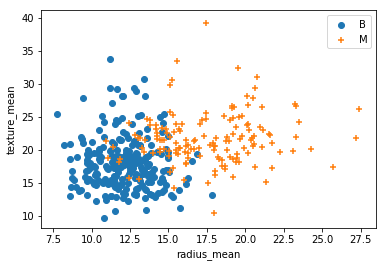

In [22]:
markers=['o','+']
label=["B","M"]
for i in range(2):
    xs=X_train['radius_mean'][y_train==i]
    ys=X_train['texture_mean'][y_train==i]
    plt.scatter(xs,ys,marker=markers[i])
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

In [23]:
print(logi.coef_)
print(logi.intercept_)

[[0.45798692 0.02979237]]
[-7.54527995]


#### KNN 사용 

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
features=["radius_mean","texture_mean"]
x=df[features]
x_train,x_test, y_train,y_test=train_test_split(x,y ,test_size=0.3, random_state=7)

In [26]:
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print("k가 {} 일때 score :{}".format(i,knn.score(x_test,y_test)))

k가 1 일때 score :0.8362573099415205
k가 2 일때 score :0.8596491228070176
k가 3 일때 score :0.8713450292397661
k가 4 일때 score :0.8596491228070176
k가 5 일때 score :0.8596491228070176
k가 6 일때 score :0.8654970760233918
k가 7 일때 score :0.8654970760233918
k가 8 일때 score :0.8713450292397661
k가 9 일때 score :0.8713450292397661


모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행

In [27]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [28]:
data.drop('id',axis=1,inplace=True)
x=data.drop('diagnosis',axis=1)

In [29]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [31]:
logi.fit(x_train,y_train)

C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
print(logi.score(x_test,y_test))

0.9473684210526315


In [33]:
# 모든 속성을 다 사용한 경우 knn 의 성능
for i in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print("k가 {} 일때 score :{}".format(i,knn.score(x_test,y_test)))

k가 1 일때 score :0.9064327485380117
k가 3 일때 score :0.9298245614035088
k가 5 일때 score :0.9298245614035088
k가 7 일때 score :0.9298245614035088
k가 9 일때 score :0.9298245614035088
k가 11 일때 score :0.935672514619883
k가 13 일때 score :0.9415204678362573
k가 15 일때 score :0.935672514619883
k가 17 일때 score :0.9415204678362573
k가 19 일때 score :0.9473684210526315


In [34]:
# 결정트리 
from sklearn.tree import DecisionTreeClassifier

In [35]:
tree=DecisionTreeClassifier(random_state=7)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [36]:
print("결정트리 성능:{}".format(tree.score(x_test,y_test)))

결정트리 성능:0.9298245614035088
